In [32]:
import tensorflow as tf
from   tensorflow import keras 
import matplotlib.pyplot as plt
import numpy as np 

In [33]:
(x_train ,y_train ) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [34]:
x_train = x_train / 255 
x_test = x_test / 255

In [35]:
x_train_flatterned = x_train.reshape(len(x_train),28*28)
x_test_flatterned = x_test.reshape(len(x_test) , 28 * 28)

In [52]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [53]:
cm =  tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    5,    8,    2,    1,    1],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   5,    9,  927,   15,    8,    3,   13,   11,   38,    3],
       [   2,    0,   19,  931,    1,   13,    3,   11,   23,    7],
       [   1,    1,    2,    1,  916,    0,   15,    4,   10,   32],
       [   8,    3,    3,   44,   10,  750,   22,    6,   38,    8],
       [   8,    3,    5,    1,    7,    6,  924,    2,    2,    0],
       [   1,    5,   21,    8,    8,    1,    0,  948,    3,   33],
       [   7,    6,    8,   24,    8,   19,   12,   12,  871,    7],
       [  11,    7,    1,   11,   30,    7,    0,   21,    6,  915]],
      dtype=int32)>

<Axes: >

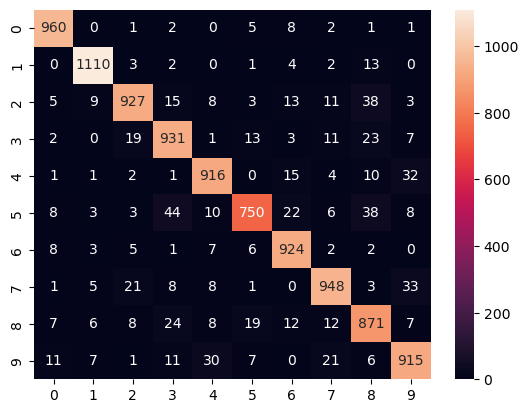

In [54]:
import seaborn as sn
plt.Figure(figsize=(10,7))
sn.heatmap(cm,annot=True , fmt='d')


In [55]:
model = keras.Sequential([
    keras.layers.Dense(100 , input_shape = (784,) ,activation = "relu"),
    keras.layers.Dense(10 ,activation = "softmax")
])

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

model.fit(x_train_flatterned , y_train ,epochs = 5)

c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9218 - loss: 0.2746
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9638 - loss: 0.1236
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9738 - loss: 0.0859
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9806 - loss: 0.0649
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9836 - loss: 0.0524


In [44]:
model2.evaluate(x_test_flatterned, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9775 - loss: 0.0748


[0.07484599947929382, 0.9775000214576721]

In [28]:
model2.predict(x_test_flatterned)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step


array([[2.42898555e-08, 1.48865436e-08, 1.16990850e-05, ...,
        9.98791397e-01, 3.22307983e-06, 5.38940276e-06],
       [2.43535281e-09, 9.38305220e-06, 9.99986053e-01, ...,
        7.50988491e-14, 5.12105487e-07, 5.28224145e-14],
       [7.10152563e-07, 9.98443186e-01, 2.73411279e-04, ...,
        9.24690685e-04, 2.30524529e-04, 4.47697721e-06],
       ...,
       [1.08868721e-14, 6.65935362e-11, 1.23377491e-12, ...,
        3.18820003e-06, 9.61141723e-07, 1.53993115e-05],
       [7.21910887e-09, 7.70305542e-10, 1.05144941e-10, ...,
        4.57752697e-10, 1.06652653e-04, 3.56779571e-11],
       [2.05893214e-09, 5.32772162e-15, 1.00976072e-08, ...,
        7.98682342e-14, 4.81179319e-10, 1.57634183e-10]], dtype=float32)

In [79]:
from PIL import Image 

def preprocessing(image):
    new_image  = Image.open(image).convert("L")
    new_image  = new_image.resize((28 , 28))
    new_image  = np.array(new_image)
    new_image = 255 - new_image
    new_image  = new_image / 255
    new_image_flatterned = new_image.reshape(1,28*28)
    return new_image_flatterned


def predict(new_image_flatterned):
    prediction = model2.predict(new_image_flatterned)
    max_pred =[ np.argmax(i) for i in prediction]
    return max_pred


image = "../Samples/7.png"

new_image_flatterned = preprocessing(image)
predict(new_image_flatterned)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


[np.int64(3)]

In [75]:
print(new_image_flatterned[0].shape)
print(x_train_flatterned.shape)

(784,)
(60000, 784)


In [ ]:

new_image_flatterned = preprocessing(image)
predict(new_image_flatterned)

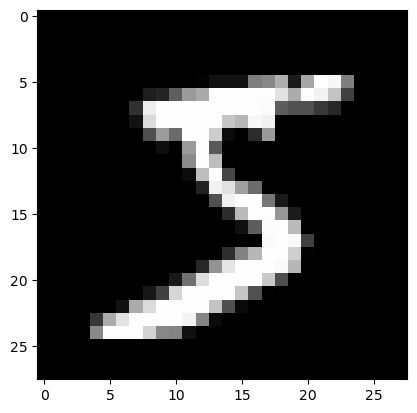

In [69]:
plt.imshow(x_train[0], cmap="gray")


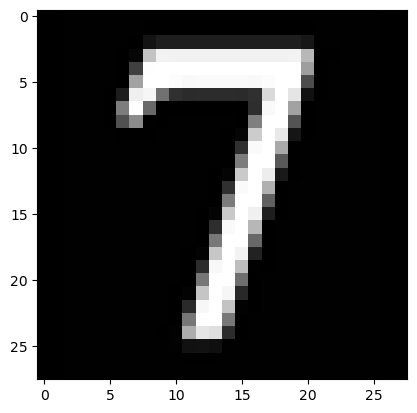

In [70]:
plt.imshow(new_image_flatterned.reshape(28,28), cmap="gray")


In [ ]:
import pickle 
with open('./model.pickle','wb') as file :
    pickle.dump(model2,file)